In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
df = df.dropna()
df = df.reset_index(drop=True)

In [4]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
##TODO: remember to convert into numpy
XX = df[['Horsepower','Cylinders','Displacement','Weight','Acceleration']].to_numpy()

In [6]:
##TODO: set the expanded input for calculation manually
A = np.hstack((XX,np.ones((XX.shape[0],1))))

In [7]:
A

array([[1.300e+02, 8.000e+00, 3.070e+02, 3.504e+03, 1.200e+01, 1.000e+00],
       [1.650e+02, 8.000e+00, 3.500e+02, 3.693e+03, 1.150e+01, 1.000e+00],
       [1.500e+02, 8.000e+00, 3.180e+02, 3.436e+03, 1.100e+01, 1.000e+00],
       ...,
       [8.400e+01, 4.000e+00, 1.350e+02, 2.295e+03, 1.160e+01, 1.000e+00],
       [7.900e+01, 4.000e+00, 1.200e+02, 2.625e+03, 1.860e+01, 1.000e+00],
       [8.200e+01, 4.000e+00, 1.190e+02, 2.720e+03, 1.940e+01, 1.000e+00]])

In [8]:
y = df['MPG'].to_numpy()

In [9]:
from sklearn.linear_model import LinearRegression
##TODO:
reg = LinearRegression().fit(XX, y)

In [10]:
reg.coef_,reg.intercept_

(array([-4.52570802e-02, -3.97928359e-01, -8.31301222e-05, -5.18691735e-03,
        -2.91047140e-02]),
 np.float64(46.26430785257121))

In [11]:
reg.score(XX,y)

0.7076926326770515

In [12]:
##TODO: output 𝑖𝑛𝑣(𝐴′𝐴)∗(𝐴′𝑦)
np.linalg.inv(A.T@A)@(A.T@y)

array([-4.52570802e-02, -3.97928359e-01, -8.31301222e-05, -5.18691735e-03,
       -2.91047140e-02,  4.62643079e+01])

In [13]:
from sklearn.linear_model import LinearRegression
##TODO: disable the intercept term in the model
reg_no_bias = LinearRegression(fit_intercept=False).fit(XX, y)

In [14]:
reg_no_bias.score(XX,y)

0.48022728892039956

In [15]:
## We are to extract single feature for polynomial regression
X_hp = df[['Horsepower']].to_numpy()

In [16]:
X_hp.shape

(392, 1)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

##TODO: we get poly features as X_poly
poly_features = PolynomialFeatures(include_bias=False)
X_poly = poly_features.fit_transform(X_hp)

In [26]:
X_poly.shape

(392, 2)

In [27]:
lin_reg = LinearRegression().fit(X_poly, y)
##TODO: fit the model and output intercept and coeffcients
lin_reg.intercept_,lin_reg.coef_

(np.float64(56.90009970211295), array([-0.46618963,  0.00123054]))

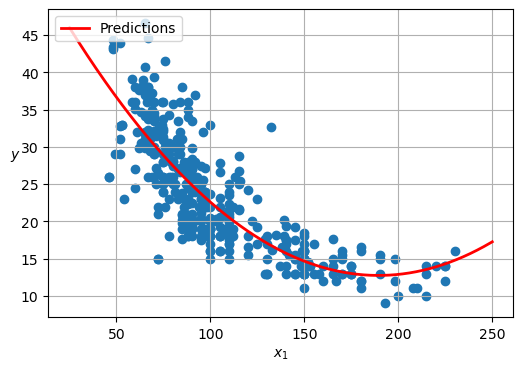

In [28]:
import matplotlib.pyplot as plt
X_new = np.linspace(25, 250, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.scatter(X_hp, y)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.grid()

plt.show()

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
##TODO: split the data into training and testing subsets
XX = df[['Horsepower','Cylinders','Displacement','Weight','Acceleration']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    XX, y, test_size=0.25, random_state=20260212
    ##TODO
)

In [30]:

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((294, 5), (98, 5), (294,), (98,))

In [31]:
X_train

array([[1.530e+02, 8.000e+00, 3.510e+02, 4.154e+03, 1.350e+01],
       [9.500e+01, 4.000e+00, 1.130e+02, 2.278e+03, 1.550e+01],
       [6.300e+01, 4.000e+00, 1.050e+02, 2.215e+03, 1.490e+01],
       ...,
       [6.700e+01, 4.000e+00, 7.900e+01, 1.963e+03, 1.550e+01],
       [7.500e+01, 4.000e+00, 9.000e+01, 2.108e+03, 1.550e+01],
       [1.500e+02, 8.000e+00, 3.040e+02, 4.257e+03, 1.550e+01]])

In [32]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

alphas = np.logspace(-4, 4, 100)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=5))
])
clf = model.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7342662710170116

In [33]:
model.named_steps["ridge"].alpha_

np.float64(10.235310218990268)

In [34]:
model.named_steps["ridge"].coef_

array([-1.79457582, -0.75273576, -0.77933222, -3.43180782, -0.17126369])

In [35]:
model.named_steps["ridge"].intercept_

np.float64(23.517687074829933)

In [36]:
from sklearn.linear_model import LassoCV

In [37]:
alphas = np.logspace(-4, 4, 100)

model_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=alphas, cv=5))
])
clf = model_1.fit(X_train, y_train)

In [38]:
clf.score(X_test,y_test)

0.7370713868776742

In [39]:
model_1.named_steps["lasso"].coef_,model_1.named_steps["lasso"].intercept_

(array([-1.66647012, -0.6106762 , -0.09390679, -4.27565345,  0.        ]),
 np.float64(23.517687074829933))

In [40]:
model_1.named_steps["lasso"].alpha_

np.float64(0.08111308307896872)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

alphas_to_check = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]

coefs = {}

for a in alphas_to_check:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=a, max_iter=10000))
    ])
    model.fit(X_train, y_train)
    coefs[a] = model.named_steps["lasso"].coef_

for a, c in coefs.items():
    print(f"alpha={a}, coef={c}")


alpha=0.001, coef=[-1.82461106 -0.66206187 -0.10605571 -4.20604889 -0.10515222]
alpha=0.01, coef=[-1.77904683 -0.65366192 -0.09501254 -4.23860046 -0.06811733]
alpha=0.1, coef=[-1.65700916 -0.60098348 -0.09922922 -4.26868807  0.        ]
alpha=1, coef=[-1.20519702 -0.14632655 -0.34984396 -3.93392605  0.        ]
alpha=2, coef=[-0.72256384 -0.         -0.30830927 -3.52073562  0.        ]
alpha=3, coef=[-0.25031268 -0.         -0.13337512 -3.09131204  0.        ]
alpha=4, coef=[-0.         -0.         -0.         -2.43165548  0.        ]
alpha=5, coef=[-0.         -0.         -0.         -1.43165548  0.        ]
alpha=6, coef=[-0.         -0.         -0.         -0.43165548  0.        ]
alpha=7, coef=[-0. -0. -0. -0.  0.]
alpha=8, coef=[-0. -0. -0. -0.  0.]
alpha=9, coef=[-0. -0. -0. -0.  0.]
alpha=10, coef=[-0. -0. -0. -0.  0.]
alpha=100, coef=[-0. -0. -0. -0.  0.]
alpha=1000, coef=[-0. -0. -0. -0.  0.]


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

alphas_to_check = [0.001, 0.01, 0.1, 1, 2,3,4,5,6,7,8,9,10, 100, 1000]

coefs = {}

for a in alphas_to_check:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=a, max_iter=10000))
    ])
    model.fit(X_train, y_train)
    coefs[a] = model.named_steps["ridge"].coef_

for a, c in coefs.items():
    print(f"alpha={a}, coef={c}")

alpha=0.001, coef=[-1.82941875 -0.66221854 -0.10817904 -4.20247429 -0.10920764]
alpha=0.01, coef=[-1.82940409 -0.66216626 -0.10928987 -4.20142449 -0.10933847]
alpha=0.1, coef=[-1.82925647 -0.66167521 -0.12030272 -4.19098598 -0.11063422]
alpha=1, coef=[-1.82765169 -0.65959122 -0.22167423 -4.09217381 -0.12241929]
alpha=2, coef=[-1.8255255  -0.66205193 -0.31845389 -3.99287887 -0.13331403]
alpha=3, coef=[-1.82299053 -0.6680798  -0.40194518 -3.90288597 -0.14227611]
alpha=4, coef=[-1.820046   -0.67660914 -0.47475455 -3.82078064 -0.14961968]
alpha=5, coef=[-1.81671705 -0.6868823  -0.53883993 -3.74544153 -0.15559619]
alpha=6, coef=[-1.813041   -0.6983526  -0.59570162 -3.67596449 -0.1604095 ]
alpha=7, coef=[-1.80905969 -0.71062084 -0.64650936 -3.61160995 -0.16422683]
alpha=8, coef=[-1.80481521 -0.72339283 -0.69218926 -3.55176538 -0.16718664]
alpha=9, coef=[-1.80034769 -0.73645025 -0.73348449 -3.49591791 -0.16940456]
alpha=10, coef=[-1.79569417 -0.74963037 -0.7709987  -3.44363401 -0.17097794]
al